In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
abs(df.corr()['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [6]:
df.shape

(200, 4)

In [7]:
df.head(150)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
145,140.3,1.9,9.0,10.3
146,240.1,7.3,8.7,13.2
147,243.2,49.0,44.3,25.4
148,38.0,40.3,11.9,10.9


In [8]:
# yukarıdaki korelasyon bize hangi reklamın daha çok etkilediğini gösteriyor.
#Bütün değerlerimizde float olduğu için dummye gerek yok
df_train=df.loc[:149]
df_test=df.loc[149:]
y=df_train['Sales']
x=df_train.drop(['Sales'],axis=1)



In [9]:
y.shape,x.shape

((150,), (150, 3))

In [10]:
from pycaret.regression import *

In [33]:
a=setup(data=df_train,target='Sales')

,Description,Value
0,session_id,2087
1,Target,Sales
2,Original Data,"(150, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(104, 3)"


In [34]:
b=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5311,0.6430,0.7072,0.9729,0.0763,0.0718,0.0260
gbr,Gradient Boosting Regressor,0.6931,1.0162,0.9325,0.9543,0.0861,0.0823,0.0060
rf,Random Forest Regressor,0.7381,1.0166,0.9572,0.9540,0.0898,0.0864,0.0310
xgboost,Extreme Gradient Boosting,0.7962,1.0749,0.9751,0.9524,0.0887,0.0873,0.0160
ada,AdaBoost Regressor,0.9876,1.6942,1.2668,0.9206,0.1116,0.1043,0.0100
dt,Decision Tree Regressor,1.0142,2.1559,1.3133,0.9022,0.1156,0.1206,0.0030
lightgbm,Light Gradient Boosting Machine,1.2210,3.0867,1.6073,0.8598,0.1522,0.1572,0.0050
lasso,Lasso Regression,1.4006,3.4747,1.7532,0.8385,0.1704,0.1747,0.0030
en,Elastic Net,1.4006,3.4817,1.7535,0.8376,0.1714,0.1753,0.0030
br,Bayesian Ridge,1.4042,3.5053,1.7596,0.8363,0.1720,0.1760,0.0030


In [13]:
from sklearn.tree import ExtraTreeRegressor

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [17]:
x_train.shape,y_train.shape

((120, 3), (120,))

In [18]:
gbr=GradientBoostingRegressor()

In [19]:
öğren=gbr.fit(x_train,y_train)

In [20]:
tahmin=öğren.predict(x_test)

In [21]:
(mean_squared_error(y_test,tahmin))**0.5

0.8770813686503152

In [22]:
(r2_score(y_test,tahmin))

0.9780734037809572

In [23]:
etr=ExtraTreeRegressor()

In [24]:
tra=etr.fit(x_train,y_train)

In [25]:
pred=tra.predict(x_test)

In [26]:
(mean_squared_error(y_test,pred))**0.5

1.6110038278456487

In [27]:
(r2_score(y_test,pred))

0.9260250649553009

In [28]:
o=df_test['Sales']

In [29]:
del df_test['Sales']

In [30]:
predictions=gbr.predict(df_test)

In [31]:
output=pd.DataFrame({'Sales':predictions})

In [32]:
output

,Sales
0,9.892975
1,14.736019
2,11.219884
3,16.126456
4,18.723802
5,15.669626
6,2.027499
7,13.987490
8,11.537484
9,6.447630


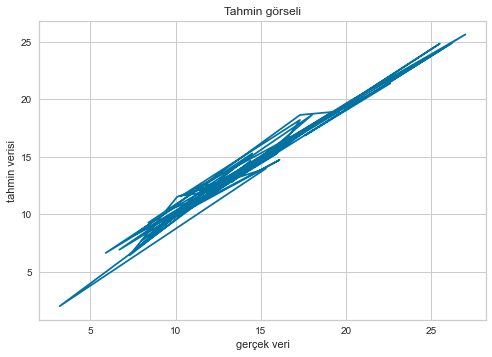

In [39]:
plt.plot(o,predictions)
plt.xlabel('gerçek veri')
plt.ylabel('tahmin verisi')
plt.title('Tahmin görseli')

plt.show()